# Forecasting Time Series Data using Auto_ARIMA

In [1]:
import pandas as pd
from pathlib import Path
import pmdarima as pm
from pmdarima import model_selection
import matplotlib.pyplot as plt



In [2]:
milk_file = Path('../../datasets/Ch10/milk_production.csv')

milk = pd.read_csv(milk_file, 
                   index_col='month', 
                   parse_dates=True)

In [3]:
train, test = model_selection.train_test_split(milk, test_size=0.15)

### ---delete testing


**Using `diff` from `statsmodels`**

In [4]:
from statsmodels.tsa.statespace.tools import diff

In [5]:
milk.head()

,production
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [8]:
milk.diff(1).head()

,production
month,
1962-01-01,NaN
1962-02-01,-28.0
1962-03-01,79.0
1962-04-01,16.0
1962-05-01,71.0


<AxesSubplot:xlabel='month'>

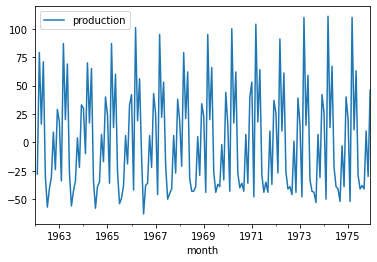

In [11]:
milk.diff(1).plot()

<AxesSubplot:xlabel='month'>

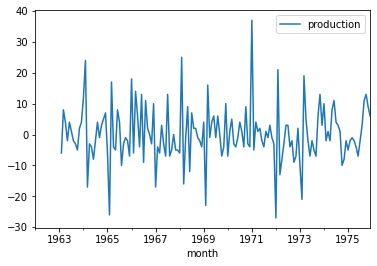

In [10]:
# twice differencing 
milk.diff(12).diff(1).plot()

In [12]:
diff(milk ,k_diff=1).head()

,production
month,
1962-02-01,-28.0
1962-03-01,79.0
1962-04-01,16.0
1962-05-01,71.0
1962-06-01,-30.0


<AxesSubplot:xlabel='month'>

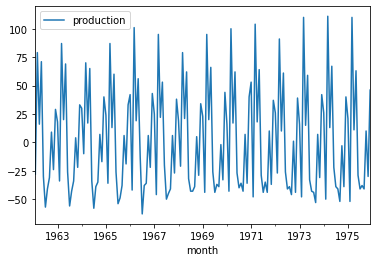

In [13]:
diff(milk ,k_diff=1).plot()

In [16]:
milk.diff(12).diff(1).dropna().head()

,production
month,
1963-02-01,-6.0
1963-03-01,8.0
1963-04-01,4.0
1963-05-01,-2.0
1963-06-01,4.0


In [15]:
diff(milk, k_diff=1, k_seasonal_diff=1, seasonal_periods=12).head()

,production
month,
1963-02-01,-6.0
1963-03-01,8.0
1963-04-01,4.0
1963-05-01,-2.0
1963-06-01,4.0


<AxesSubplot:xlabel='month'>

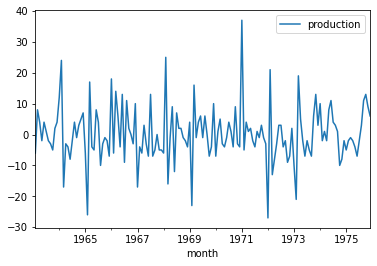

In [ ]:
diff(milk, k_diff=1, k_seasonal_diff=1, seasonal_periods=12).head()

In [11]:
from statsmodels.tsa.stattools import acf, pacf, acovf, pacf_ols, pacf_yw
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf, seasonal_plot
from scipy.stats import pearsonr

In [39]:
acf(milk, fft=False, nlags=10)

array([1.        , 0.89157378, 0.77817897, 0.62027149, 0.48666361,
       0.4281481 , 0.37606367, 0.41477252, 0.45425153, 0.56181499,
       0.68655906])

In [32]:
pearsonr(milk.values.ravel(), milk.values.ravel())

(1.0, 0.0)

In [40]:
for i in range(0, 11):
    d = milk.shift(i).dropna()
    m = milk.iloc[i:]
    p = pearsonr(m.values.ravel(), d.values.ravel())
    print(p[0])

1.0
0.9007955369510077
0.7956520464161647
0.6380100541047523
0.5030171621999081
0.44441611731441033
0.3937119642439715
0.44127243314740167
0.495161590176578
0.6248312041652151
0.777619915657277


**PACF and ACF**

In [8]:
m = milk.copy()
m.index.freq = 'MS'
m.head()

,production
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


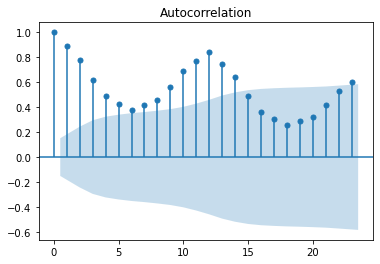

In [69]:
plot_acf(milk);

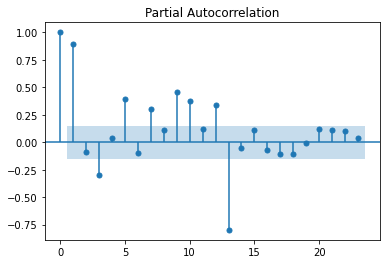

In [61]:
plot_pacf(milk);

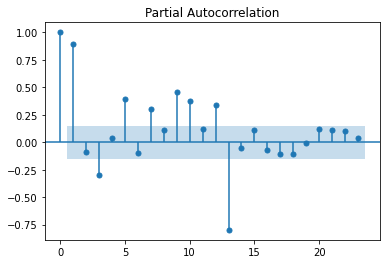

In [41]:
plot_pacf(milk, method='ywunbiased');

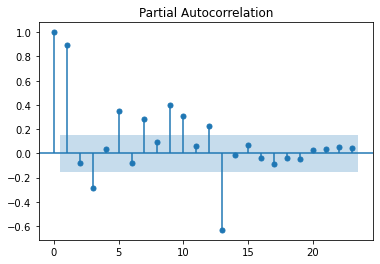

In [43]:
plot_pacf(milk, method='ywmle');

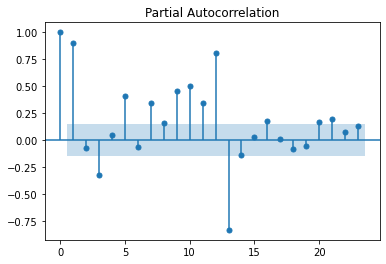

In [44]:
plot_pacf(milk, method='ols');

In [54]:
pacf(milk, nlags=13)

array([ 1.        ,  0.89691254, -0.08641102, -0.30065408,  0.03704353,
        0.38861552, -0.09669472,  0.30386494,  0.10921593,  0.46009995,
        0.37723165,  0.1203746 ,  0.33930438, -0.79801803])

In [55]:
# same as pacf_yw(milk, nlags=13)
# same as pacf(milk, nlags=13)
# same as pacf_yw(milk, nlags=13, method='unbiased')
pacf(milk, nlags=13, method='ywunbiased')

array([ 1.        ,  0.89691254, -0.08641102, -0.30065408,  0.03704353,
        0.38861552, -0.09669472,  0.30386494,  0.10921593,  0.46009995,
        0.37723165,  0.1203746 ,  0.33930438, -0.79801803])

In [56]:
# same as pacf_yw(milk, nlags=13, method='mle')
pacf(milk, nlags=13, method='ywm') 

array([ 1.        ,  0.89157378, -0.08154629, -0.2817671 ,  0.03221593,
        0.35025969, -0.08222765,  0.28348199,  0.09187587,  0.39909094,
        0.30447405,  0.06273194,  0.22236459, -0.63184881])

In [57]:
# same as pacf_ols(milk, nlags=13)
pacf(milk, nlags=13, method='ols')

array([ 1.        ,  0.89565037, -0.07631617, -0.32685497,  0.0457326 ,
        0.41087767, -0.06138829,  0.34828073,  0.15525516,  0.45722816,
        0.49807693,  0.34232677,  0.8083725 , -0.83259086])

In [58]:
pacf_ols(milk, nlags=13)

array([ 1.        ,  0.89565037, -0.07631617, -0.32685497,  0.0457326 ,
        0.41087767, -0.06138829,  0.34828073,  0.15525516,  0.45722816,
        0.49807693,  0.34232677,  0.8083725 , -0.83259086])

In [59]:
pacf_yw(milk, nlags=13)

array([ 1.        ,  0.89691254, -0.08641102, -0.30065408,  0.03704353,
        0.38861552, -0.09669472,  0.30386494,  0.10921593,  0.46009995,
        0.37723165,  0.1203746 ,  0.33930438, -0.79801803])

In [60]:
pacf_yw(milk, nlags=13, method='mle')

array([ 1.        ,  0.89157378, -0.08154629, -0.2817671 ,  0.03221593,
        0.35025969, -0.08222765,  0.28348199,  0.09187587,  0.39909094,
        0.30447405,  0.06273194,  0.22236459, -0.63184881])

In [62]:
from pandas.plotting import autocorrelation_plot, lag_plot

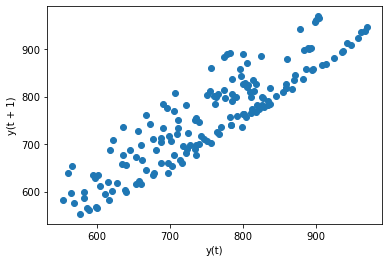

In [65]:
lag_plot(milk);

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

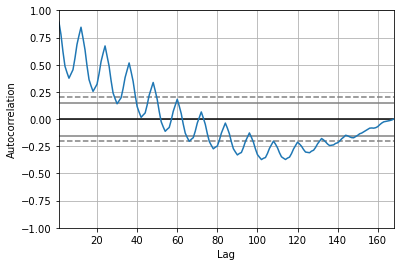

In [64]:
autocorrelation_plot(milk)

## -- END

In [4]:
auto_model = pm.auto_arima(train, 
                           seasonal=True, 
                           m=12, 
                           test='adf',
                           stepwise=True)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  142
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -445.404
Date:                            Sat, 26 Feb 2022   AIC                            896.808
Time:                                    16:51:04   BIC                            905.387
Sample:                                         0   HQIC                           900.294
                                            - 142                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2779      0.084     -3.293      0.001      -0.443      -0.112
ma.S.L12      -0.6199      0.086     -7.200      0.000      -0.789      -0.451
sigma2        55.8091      5.854      9.533      0.000      44.335      67.283
===================================================================================
Ljung-Box (Q):                       22.84   Jarque-Bera (JB):                38.42
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                             0.85
Prob(H) (two-sided):                  0.70   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [219]:
auto_model = pm.auto_arima(train, 
                           seasonal=True, 
                           m=12, 
                           test='adf', 
                           trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=902.008, Time=0.64 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=943.069, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=909.756, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=896.808, Time=0.16 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=931.844, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=898.753, Time=0.19 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=898.737, Time=0.38 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=909.813, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.92 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=905.237, Time=0.08 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=898.634, Time=0.20 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=898.466, Time=0.18 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=897.205, Time=0.14 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=900.331, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   

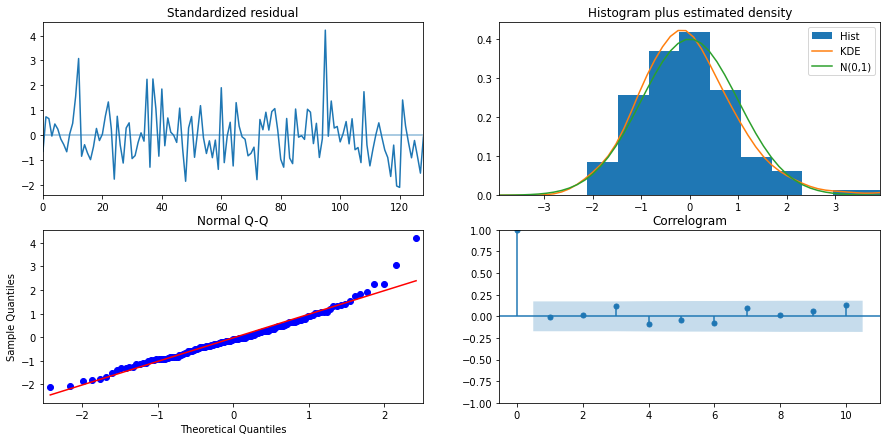

In [220]:
auto_model.plot_diagnostics(figsize=(15,7)); plt.show()

In [221]:
auto_model.scoring

'mse'

In [222]:
auto_model

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

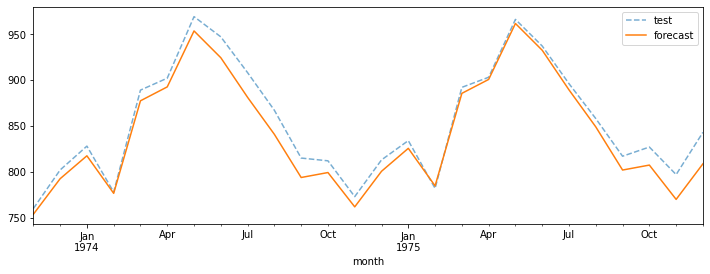

In [223]:
n = test.shape[0]
index = test.index
ax = test.plot(style='--', alpha=0.6, figsize=(12,4))
pd.Series(auto_model.predict(n_periods=n), 
          index=index).plot(style='-', ax=ax)
plt.legend(['test', 'forecast']); plt.show()

In [72]:
# n = test.shape[0]
# mape_m = mape(test, model.forecast(n))
# mape_auto = mape(test, auto_model.predict(n))
# rmse_m = rmse(test.values.ravel(), model.forecast(n))
# rmse_auto = rmse(test.values.ravel(), auto_model.predict(n))
# print(f'''
# MAPE: manual = {mape_m}, auto = {mape_auto}
# RMSE: manual = {rmse_m}, auto = {rmse_auto}
# AIC : manual = {model.aic}, auto = {auto_model.aic()}
# ''')

### There is more

In [230]:
from pmdarima import datasets


In [231]:
pm.__version__

'1.8.1'

In [232]:
from pmdarima.arima.utils import ndiffs, nsdiffs

# ADF test:
n_adf = ndiffs(milk, test='adf') 
# KPSS test (auto_arima default):
n_kpss = ndiffs(milk, test='kpss') 
# PP test:
n_pp = ndiffs(milk, test='pp')  

In [233]:
print(f'''
differencing (d) term using:
    ADF: {n_adf}
    KPSS: {n_kpss}
    PP: {n_pp}
''')


differencing (d) term using:
    ADF: 0
    KPSS: 1
    PP: 0



In [234]:
# OCSB test
max_D = nsdiffs(milk, test='ocsb', m=12, max_D=12) 

In [235]:
print(f'''
Seasonal differencing (D) term: {max_D}
''')


Seasonal differencing (D) term: 1



In [236]:
model = pm.auto_arima(train, 
                      seasonal=True,
                      with_intercept=True,
                      d=1,
                      max_d=2,
                      start_p=0, max_p=2,
                      start_q=0, max_q=2,
                      m=12,
                      D=1,
                      max_D=2,
                      start_P=0, max_P=2,
                      start_Q=0, max_Q=2,
                      information_criterion='aic',
                      stepwise=False,
                      out_of_sample_siz=25,
                      test = 'kpss',
                      score='mape',
                      trace=True)

 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=944.988, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=907.049, Time=0.16 sec
 ARIMA(0,1,0)(0,1,2)[12] intercept   : AIC=908.922, Time=0.42 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=921.345, Time=0.13 sec
 ARIMA(0,1,0)(1,1,1)[12] intercept   : AIC=908.954, Time=0.22 sec
 ARIMA(0,1,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=914.245, Time=0.44 sec
 ARIMA(0,1,0)(2,1,1)[12] intercept   : AIC=910.088, Time=0.71 sec
 ARIMA(0,1,0)(2,1,2)[12] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=933.651, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=898.421, Time=0.16 sec
 ARIMA(0,1,1)(0,1,2)[12] intercept   : AIC=900.348, Time=0.72 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=911.424, Time=0.16 sec
 ARIMA(0,1,1)(1,1,1)[12] intercept   : AIC=900.364, Time=0.26 sec
 ARIMA(0,1,1)(1,1,2)[12] intercept   : AIC=inf, Time=2.44 sec
 ARIMA(0,1,1)(2,1,0)[1

In [237]:
model.out_of_sample_size

0

In [238]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  142
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -442.752
Date:                            Thu, 24 Feb 2022   AIC                            897.504
Time:                                    00:44:39   BIC                            914.663
Sample:                                         0   HQIC                           904.476
                                            - 142                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.3558      0.693     -0.513      0.608      -1.715       1.003
ar.L1         -1.2170      0.089    -13.651      0.000      -1.392      -1.042
ar.L2         -0.3177      0.102     -3.119      0.002      -0.517      -0.118
ma.L1          0.9786      0.052     18.678      0.000       0.876       1.081
ma.S.L12      -0.6044      0.093     -6.515      0.000      -0.786      -0.423
sigma2        52.9063      5.882      8.994      0.000      41.377      64.436
===================================================================================
Ljung-Box (Q):                       21.28   Jarque-Bera (JB):                55.19
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                             0.96
Prob(H) (two-sided):                  0.65   Kurtosis:                         5.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

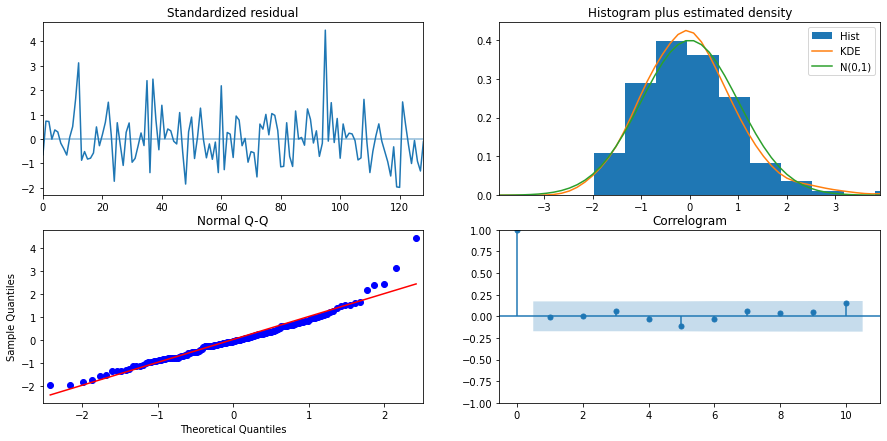

In [239]:
model.plot_diagnostics(figsize=(15,7));plt.show()

# Forecasting Time Series Data using Prophet

In [35]:
from prophet import Prophet
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


milk_file = Path('../../datasets/Ch10/milk_production.csv')

milk = pd.read_csv(milk_file, parse_dates=['month'])

milk.columns = ['ds', 'y']

In [36]:
milk.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [37]:
idx = round(len(milk) * 0.85)
idx

143

In [38]:
train_milk = milk[:idx]
test_milk = milk[idx:]
print(train_milk.shape)
print(test_milk.shape)

(143, 2)
(25, 2)


In [82]:
model = (
        Prophet(seasonality_mode='multiplicative')
         .fit(train_milk)
        )

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.63781
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       562.843     0.0483286       651.484           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     171       566.489   0.000142385        111.47   1.637e-06       0.001      253  LS failed, Hessian reset 
     199       566.761   0.000476663       82.0237           1           1      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294       568.034   0.000281645       236.354   2.178e-06       0.001      450  LS failed, Hessian reset 
     299       568.124   0.000858039       210.683           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       568.265   0.000143229       203.491   1.888e-06       0.001      501  LS failed, Hessian rese

In [69]:
future = model.make_future_dataframe(len(test_milk), freq='MS')

In [72]:
forecast = model.predict(future)

In [73]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yhat'],
      dtype='object')

In [74]:
cols = ['ds', 'yhat', 'yhat_lower', 'yhat_upper']

In [164]:
milk.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [163]:
forecast[cols].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,591.934628,579.728909,603.947683
1,1962-02-01,560.094334,547.201045,572.473135
2,1962-03-01,636.681520,624.651023,649.648371
3,1962-04-01,651.950643,639.627895,663.917537
4,1962-05-01,703.871905,692.241782,715.615559


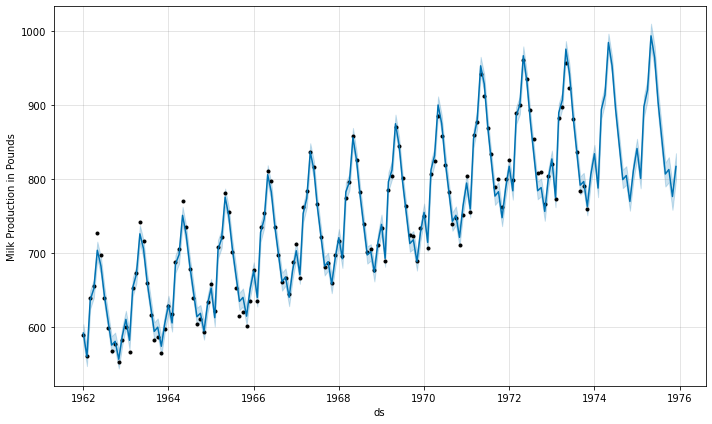

In [161]:
model.plot(forecast, ylabel='Milk Production in Pounds')
plt.show()

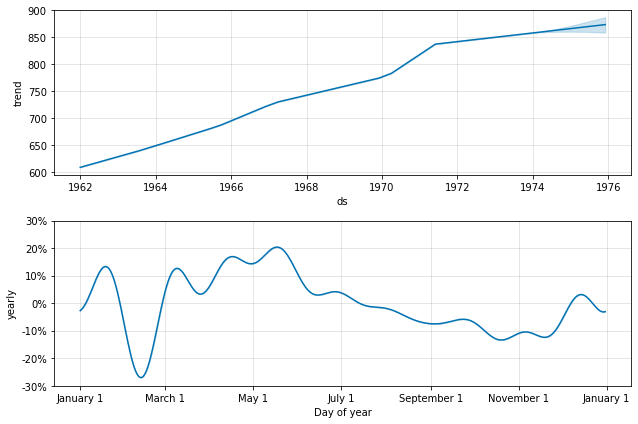

In [77]:
model.plot_components(forecast)
plt.show()

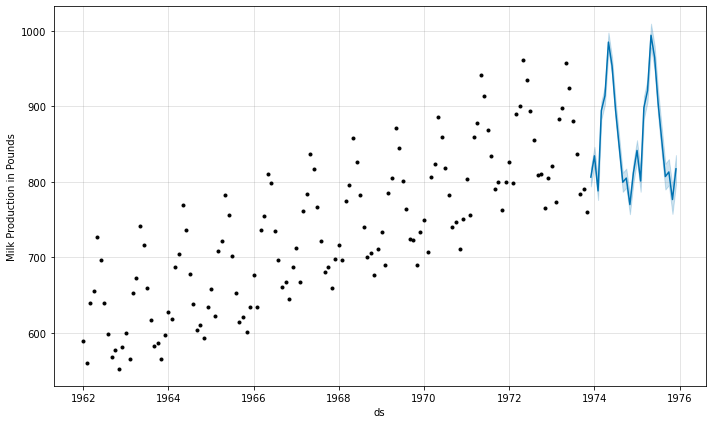

In [168]:
predicted = model.predict(test_milk)
model.plot(predicted, ylabel='Milk Production in Pounds')
plt.show()

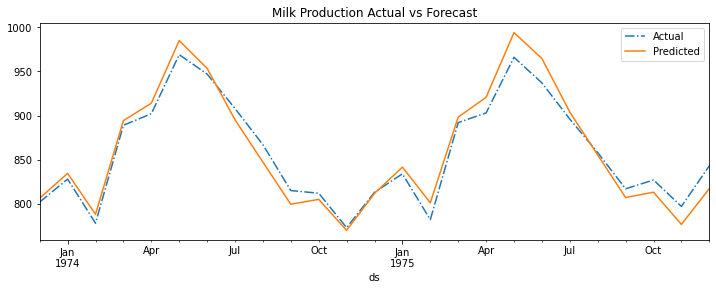

In [79]:
ax = test_milk.plot(x='ds', y='y', 
                    label='Actual', 
                    style='-.', 
                    figsize=(12,4))
predicted.plot(x='ds', y='yhat', 
               label='Predicted', 
               ax=ax)
plt.title('Milk Production Actual vs Forecast')
plt.show()

### Forecasting with Prophet Example

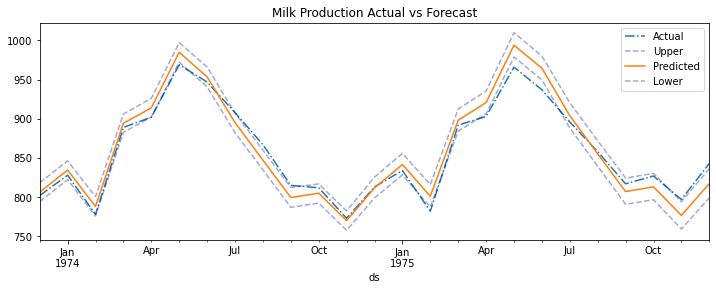

In [80]:
ax = test_milk.plot(x='ds', y='y', 
                    label='Actual', 
                    style='-.', 
                    figsize=(12,4))
predicted.plot(x='ds',y='yhat_upper', 
               label='Upper', 
               ax=ax, 
               color='navy', 
               style='--', alpha=0.35)
predicted.plot(x='ds', y='yhat', 
               label='Predicted', 
               ax=ax)
predicted.plot(x='ds',y='yhat_lower', 
               label='Lower', 
               ax=ax, 
               color='navy', 
               style='--', alpha=0.35)
plt.title('Milk Production Actual vs Forecast'); plt.show()

### How it works


In [132]:
model.changepoints.shape

(25,)

In [155]:
milk.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [154]:
milk.tail()

,ds,y
163,1975-08-01,858
164,1975-09-01,817
165,1975-10-01,827
166,1975-11-01,797
167,1975-12-01,843


In [133]:
model.changepoints

5     1962-06-01
9     1962-10-01
14    1963-03-01
18    1963-07-01
23    1963-12-01
27    1964-04-01
32    1964-09-01
36    1965-01-01
41    1965-06-01
45    1965-10-01
50    1966-03-01
54    1966-07-01
59    1966-12-01
63    1967-04-01
68    1967-09-01
72    1968-01-01
77    1968-06-01
81    1968-10-01
86    1969-03-01
90    1969-07-01
95    1969-12-01
99    1970-04-01
104   1970-09-01
108   1971-01-01
113   1971-06-01
Name: ds, dtype: datetime64[ns]

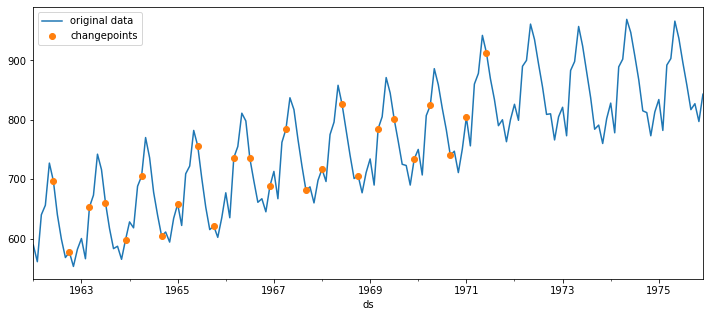

In [146]:
ax = milk.set_index('ds').plot(figsize=(12,5))
milk.set_index('ds').loc[model.changepoints].plot(style='o', ax=ax)
plt.legend(['original data', 'changepoints'])
plt.show()

### There is more

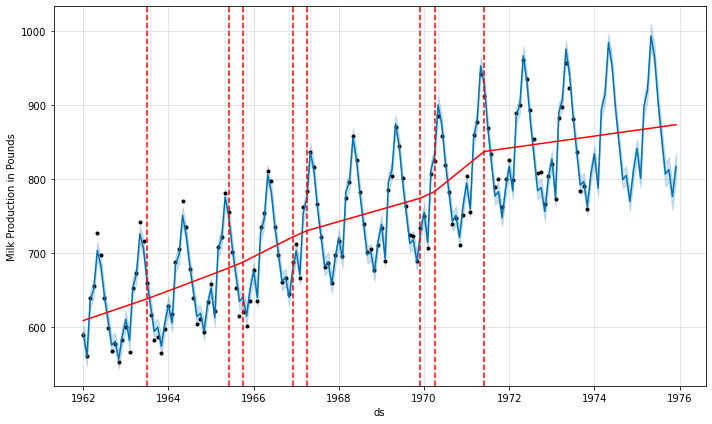

In [169]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast, ylabel='Milk Production in Pounds')
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

**Logistic Growth**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.62299
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       332.637   3.49145e-07       103.319      0.2772           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       332.637   9.42909e-09       98.1949      0.7554      0.7554      149   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


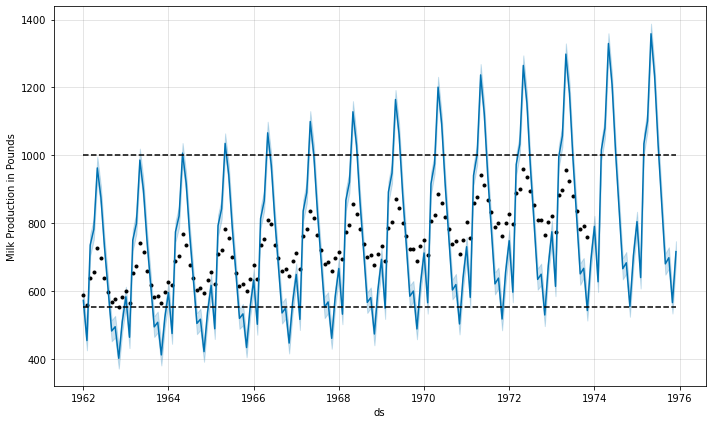

In [202]:
train = train_milk.copy()
train['cap'] = 1000
train['floor']=train['y'].min()
model = (
        Prophet(seasonality_mode='multiplicative', growth='logistic')
         .fit(train)
        )

future = model.make_future_dataframe(len(test_milk), freq='MS')
future['cap']=1000
future['floor']=train['y'].min()
forecast = model.predict(future)
model.plot(forecast, ylabel='Milk Production in Pounds')
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

# Forecasting Multivariate Time Series Data using VAR

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
import statsmodels as sm
import matplotlib as mp

In [4]:
print(
f'''
======================
LIBRARY VERSIONS USED
======================

pandas: {pd.__version__}
matplotlib: {mp.__version__}
statsmodels: {sm.__version__}
'''
)


LIBRARY VERSIONS USED

pandas: 1.3.4
matplotlib: 3.5.0
statsmodels: 0.11.1



In [95]:
start = "01-01-1990"
end = "01-31-2022"

economic_df = web.FredReader(symbols=["FEDFUNDS", "unrate", "CORESTICKM159SFRBATL"], 
                            start=start, end=end).read()
# inflation = web.FredReader(symbols=["FPCPITOTLZGUSA "], 
#                         start=start, end=end).read()
# unemp_df = web.FredReader(symbols=["unrate"], 
#                           start=start, end=end).read()

In [213]:
# economic_df.to_pickle('economic_df.pickle')
economic_df = pd.read_pickle('economic_df.pickle')

In [214]:
economic_df.to_csv('economic_df.csv')

In [6]:
economic_df.head()

,FEDFUNDS,unrate,CORESTICKM159SFRBATL
DATE,,,
1990-01-01,8.23,5.4,4.920589
1990-02-01,8.24,5.3,4.935526
1990-03-01,8.28,5.2,5.208701
1990-04-01,8.26,5.4,5.294134
1990-05-01,8.18,5.4,5.183754


In [7]:
economic_df.tail()

,FEDFUNDS,unrate,CORESTICKM159SFRBATL
DATE,,,
2021-09-01,0.08,4.7,2.649506
2021-10-01,0.08,4.6,3.042940
2021-11-01,0.08,4.2,3.205069
2021-12-01,0.08,3.9,3.467011
2022-01-01,0.08,4.0,3.982988


In [8]:
economic_df.isna().sum()

FEDFUNDS                0
unrate                  0
CORESTICKM159SFRBATL    0
dtype: int64

In [9]:
economic_df.shape

(385, 3)

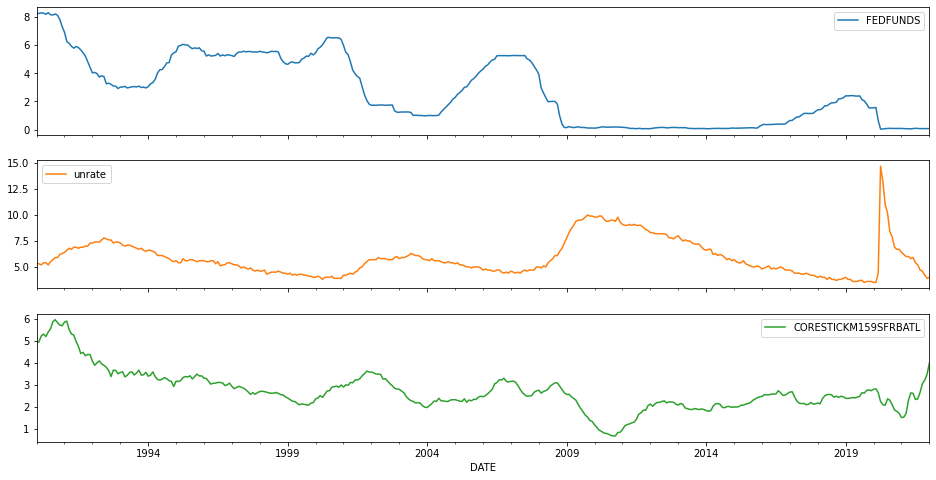

In [10]:
economic_df.plot(subplots=True, figsize=(16,8)); plt.show()

In [11]:
print(adfuller(economic_df['FEDFUNDS'])[1])
print(adfuller(economic_df['unrate'])[1])
print(adfuller(economic_df['CORESTICKM159SFRBATL'])[1])

0.016738714895698656
0.016835735958752783
0.008168225517170292


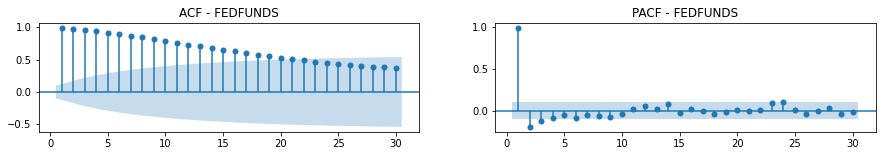

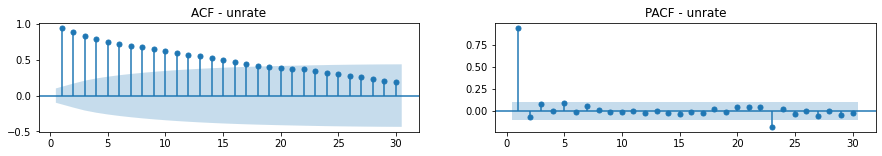

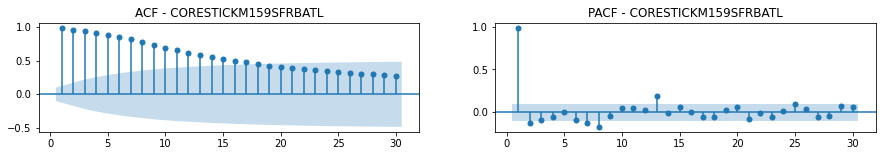

In [12]:
for col in economic_df.columns:
    fig, ax = plt.subplots(1,2, figsize=(15,2))
    plot_acf(economic_df[col], zero=False, 
             lags=30, ax=ax[0], title=f'ACF - {col}')
    plot_pacf(economic_df[col], zero=False, 
              lags=30, ax=ax[1], title=f'PACF - {col}');plt.show()

In [51]:
# gc_res = grangercausalitytests(df_mul_st, 5)

In [204]:
economic_df.columns

Index(['FEDFUNDS', 'unrate', 'CORESTICKM159SFRBATL'], dtype='object')

In [207]:
import numpy as np

<AxesSubplot:xlabel='FEDFUNDS', ylabel='CORESTICKM159SFRBATL'>

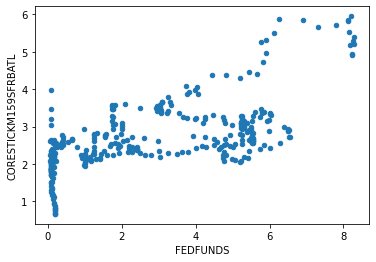

In [212]:
economic_df.plot(kind='scatter', x='FEDFUNDS', y='CORESTICKM159SFRBATL')

<AxesSubplot:xlabel='DATE'>

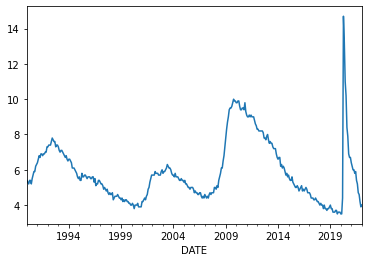

In [18]:
economic_df['unrate'].plot()

In [189]:
train = economic_df.loc[:'2019']
test = economic_df.loc['2020':]

<AxesSubplot:xlabel='DATE'>

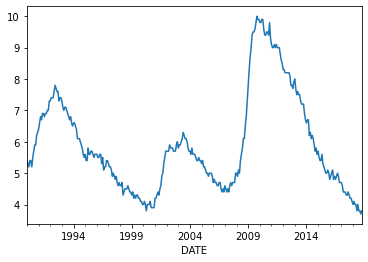

In [198]:
train['unrate'].plot()

<AxesSubplot:xlabel='DATE'>

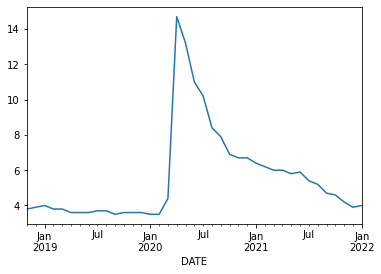

In [197]:
test['unrate'].plot()

In [192]:
economic_df.shape

(385, 3)

In [196]:
idx = round(len(economic_df) * 0.90)
train = economic_df[:idx]
test = economic_df[idx:]
print(train.shape)
print(test.shape)

(346, 3)
(39, 3)


In [199]:
model = VAR(endog=train, freq='MS')
res = model.select_order(maxlags=30)
res.summary()

,AIC,BIC,FPE,HQIC
0,0.8212,0.8569,2.273,0.8355
1,-12.15,-12.00,5.308e-06,-12.09
2,-12.65,-12.40*,3.215e-06,-12.55
3,-12.71,-12.35,3.029e-06,-12.56
4,-12.78,-12.32,2.807e-06,-12.60*
5,-12.77,-12.20,2.853e-06,-12.54
6,-12.78,-12.10,2.830e-06,-12.51
7,-12.86,-12.07,2.608e-06,-12.54
8,-12.85,-11.95,2.639e-06,-12.49
9,-12.84,-11.84,2.660e-06,-12.44


In [200]:
print(f'AIC: {res.aic} , BIC: {res.bic}, HQ: {res.hqic}, FPE: {res.fpe}')

AIC: 14 , BIC: 2, HQ: 4, FPE: 14


In [201]:
results = model.fit(14, ic='aic')

In [150]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 23, Feb, 2022
Time:                     00:57:09
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -8.73561
Nobs:                     352.000    HQIC:                  -9.58807
Log likelihood:           417.273    FPE:                3.91596e-05
AIC:                     -10.1515    Det(Omega_mle):     2.77125e-05
--------------------------------------------------------------------
Results for equation FEDFUNDS
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                           -0.049045         0.050586           -0.970           0.332
L1.FEDFUNDS                      1.426387         0.056063           25.443           0.000
L1.unrate    

In [151]:
# for col in results.resid.columns:
#     fig, ax = plt.subplots(1,2, figsize=(15,2))
#     plot_acf(results.resid[col], zero=False, 
#              lags=30, ax=ax[0], title=f'ACF - {col}')
#     plot_pacf(results.resid[col], zero=False, 
#               lags=30, ax=ax[1], title=f'PACF - {col}');plt.show()

In [152]:
results.params

,FEDFUNDS,unrate,CORESTICKM159SFRBATL
const,-0.049045,0.414999,0.066342
L1.FEDFUNDS,1.426387,-1.700733,0.034876
L1.unrate,0.020440,0.892780,-0.004465
L1.CORESTICKM159SFRBATL,-0.108736,-0.799640,1.229560
L2.FEDFUNDS,-0.341369,2.618819,-0.013281
L2.unrate,-0.003057,-0.084668,0.005679
L2.CORESTICKM159SFRBATL,-0.063809,0.845352,-0.210104
L3.FEDFUNDS,0.022182,-0.836226,-0.063946
L3.unrate,-0.028506,0.088874,0.017654
L3.CORESTICKM159SFRBATL,0.229856,-0.151521,-0.008519


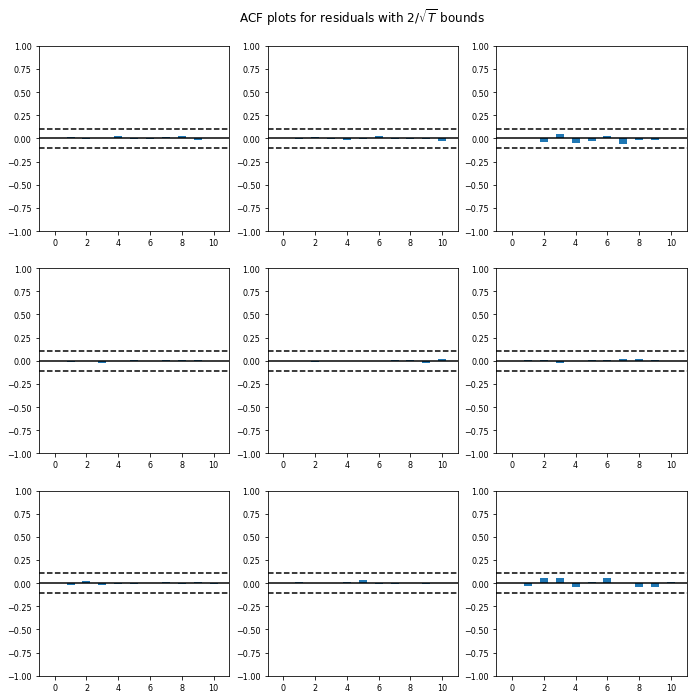

In [153]:
results.plot_acorr();

In [154]:
lag_order = results.k_ar
lag_order

14

In [174]:
n = test.shape[0]
forecast = results.forecast(test.values, n)

In [175]:
n

19

In [172]:
# n = test.shape[0]
# forecast = results.forecast(df_mul.values[-lag_order:], n)

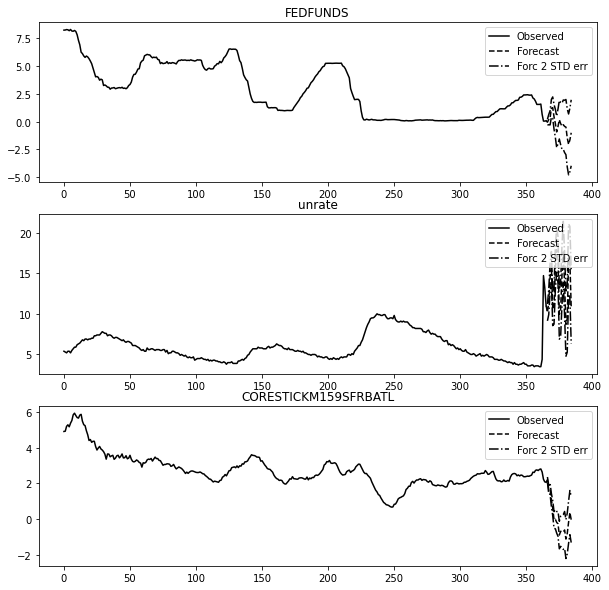

In [176]:
results.plot_forecast(n, plot_stderr=True);

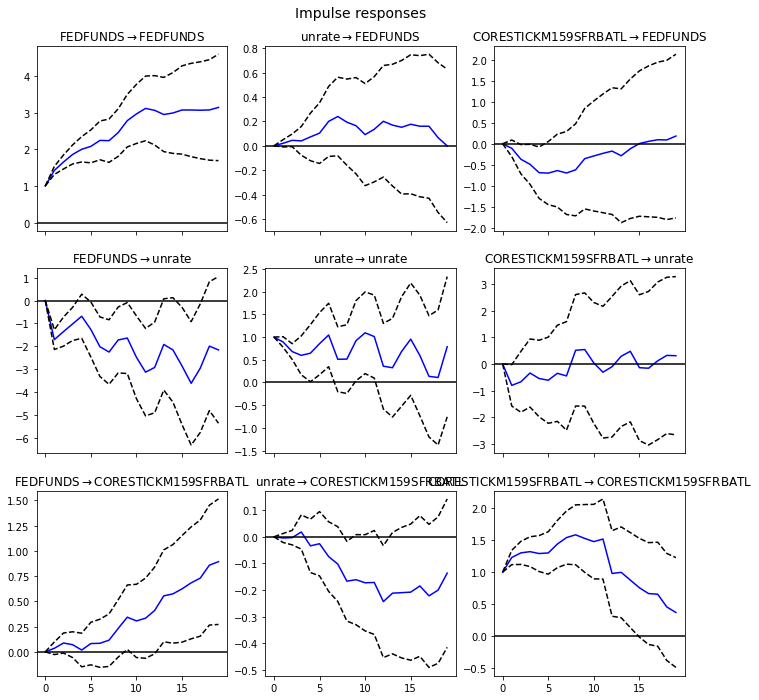

In [177]:
irf = results.irf(n)
irf.plot(orth=False);plt.show()

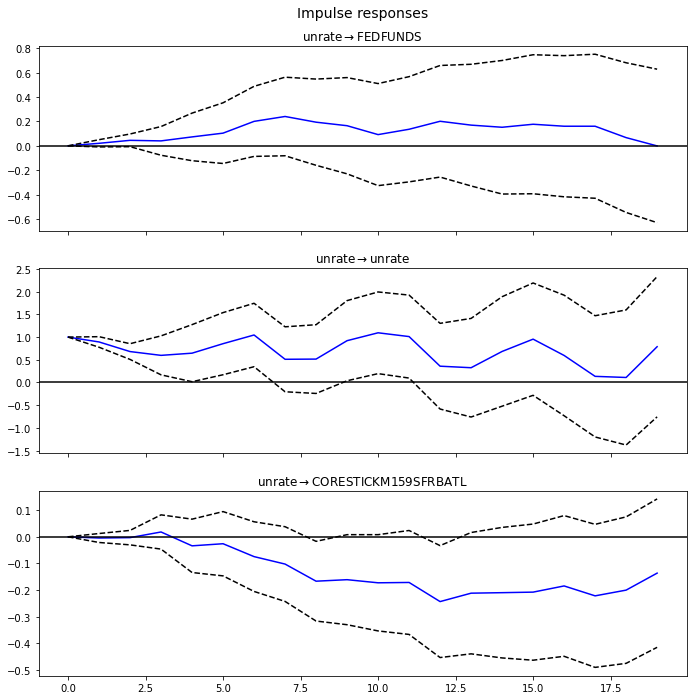

In [178]:
irf.plot(impulse='unrate');plt.show()

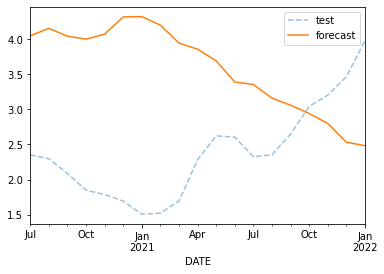

In [186]:
#train['CPALTT01USM657N'].plot(style='--', alpha=0.45).plot()
test['CORESTICKM159SFRBATL'].plot(style='--', alpha=0.45).plot()
pd.Series(forecast[ :, 2], index=test.index).plot()
plt.legend(['test', 'forecast'])

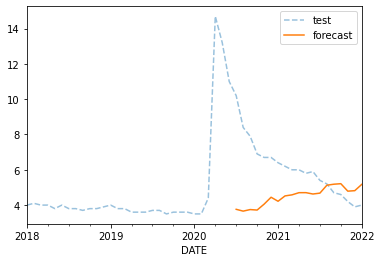

In [187]:
economic_df['unrate'].loc['2018':].plot(style='--', alpha=0.45).plot()
pd.Series(forecast[ :, 1], index=test.index).plot()
plt.legend(['test', 'forecast'])

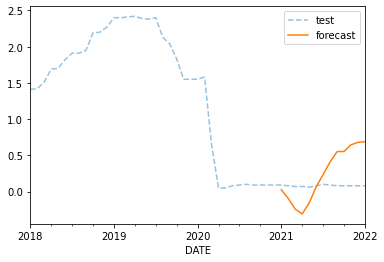

In [125]:
#train['FEDFUNDS'].loc['2018':].plot(style='--', alpha=0.45).plot()
economic_df['FEDFUNDS'].loc['2018':].plot(style='--', alpha=0.45).plot()
pd.Series(forecast[ :, 0], index=test.index).plot()
plt.legend(['test', 'forecast'])

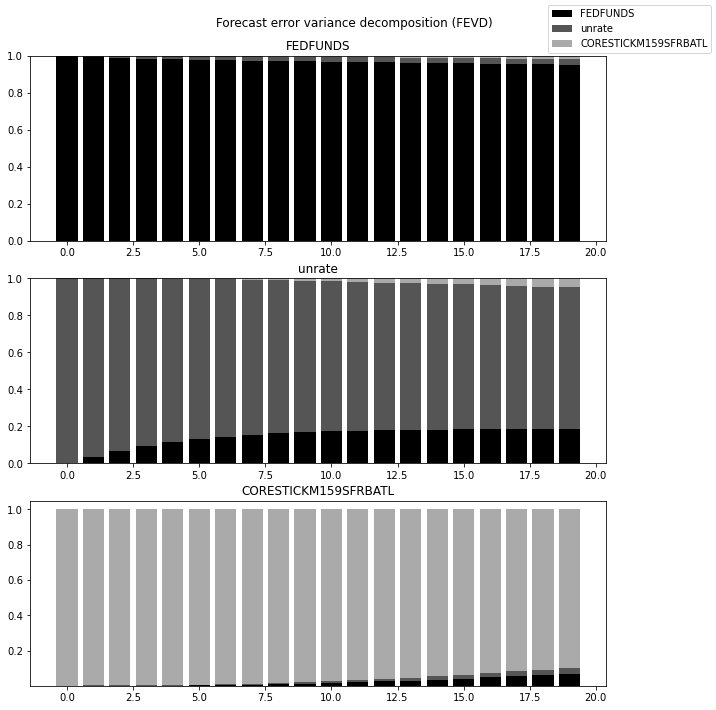

In [37]:
results.fevd(20).plot();plt.show()

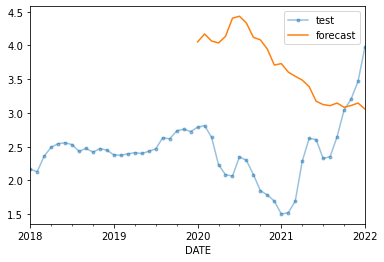

In [89]:
economic_df['CORESTICKM159SFRBATL'].loc['2018':].plot(style='.-', alpha=0.45)
pd.Series(forecast[ :, 2], index=test.index).plot()
plt.legend(['test', 'forecast'])

In [73]:
from statsmodels.tsa.arima.model import ARIMA

In [93]:
model = ARIMA(train['unrate'], order=(14,0,0)).fit()

/Users/tarekatwan/opt/anaconda3/envs/packt/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tarekatwan/opt/anaconda3/envs/packt/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tarekatwan/opt/anaconda3/envs/packt/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tarekatwan/opt/anaconda3/envs/packt/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "

In [94]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 unrate   No. Observations:                  360
Model:                ARIMA(14, 0, 0)   Log Likelihood                 202.137
Date:                Wed, 23 Feb 2022   AIC                           -372.273
Time:                        00:52:17   BIC                           -310.096
Sample:                    01-01-1990   HQIC                          -347.550
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7029      0.645      8.841      0.000       4.439       6.967
ar.L1          0.9408      0.048     19.769      0.000       0.848       1.034
ar.L2          0.1682      0.070      2.409      0.016       0.031       0.305
ar.L3          0.0200      0.077      0.258      0.796      -0.131       0.171
ar.L4         -0.0466      0.076     -0.613      0.540      -0.196       0.103
ar.L5          0.0634      0.071      0.899      0.368      -0.075       0.202
ar.L6          0.0193      0.076      0.255      0.799      -0.129       0.167
ar.L7         -0.1098      0.079     -1.397      0.162      -0.264       0.044
ar.L8         -0.0771      0.078     -0.986      0.324      -0.231       0.076
ar.L9          0.0518      0.082      0.634      0.526      -0.108       0.212
ar.L10         0.0108      0.075      0.145      0.885      -0.136       0.157
ar.L11         0.0052      0.075      0.070      0.944      -0.142       0.152
ar.L12        -0.1947      0.079     -2.479      0.013      -0.349      -0.041
ar.L13         0.1251      0.079      1.589      0.112      -0.029       0.279
ar.L14         0.0110      0.056      0.198      0.843      -0.098       0.121
sigma2         0.0187      0.001     14.148      0.000       0.016       0.021
===================================================================================
Ljung-Box (Q):                       49.85   Jarque-Bera (JB):                 8.06
Prob(Q):                              0.14   Prob(JB):                         0.02
Heteroskedasticity (H):               1.06   Skew:                             0.24
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

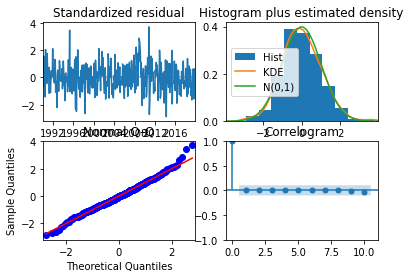

In [95]:
model.plot_diagnostics();plt.show()

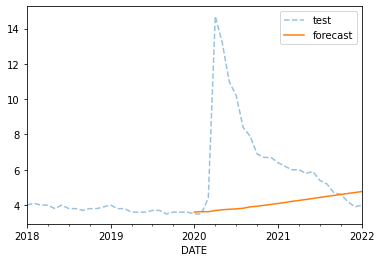

In [96]:
economic_df['unrate'].loc['2018':].plot(style='--', alpha=0.45)
pd.Series(model.forecast(n), 
                            index=test.index).plot()
plt.legend(['test', 'forecast'])

### There is more

In [133]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [134]:
res = coint_johansen(df_mul_scaled, -1, 5)

In [135]:
res.lr1

array([18.56903714,  5.90752068,  1.2438907 ])

In [136]:
res.cvt

array([[21.7781, 24.2761, 29.5147],
       [10.4741, 12.3212, 16.364 ],
       [ 2.9762,  4.1296,  6.9406]])

# Forecasting Volatility in Financial Time Series Data with GARCH


In [349]:
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

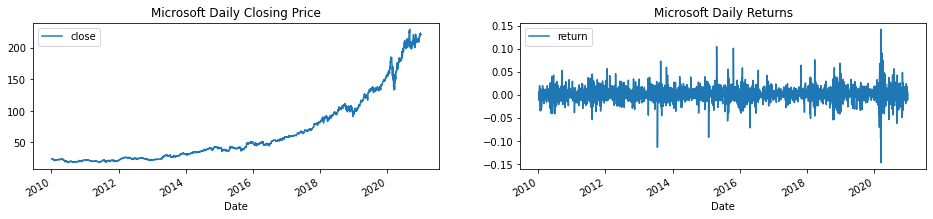

In [407]:
msft_return = msft.pct_change().dropna()
msft_return.columns = ['return']

fig, ax = plt.subplots(1,2, figsize=(16,3))
msft.plot(ax=ax[0])
msft_return.plot(ax=ax[1])
ax[0].title.set_text('Microsoft Daily Closing Price')
ax[1].title.set_text('Microsoft Daily Returns')


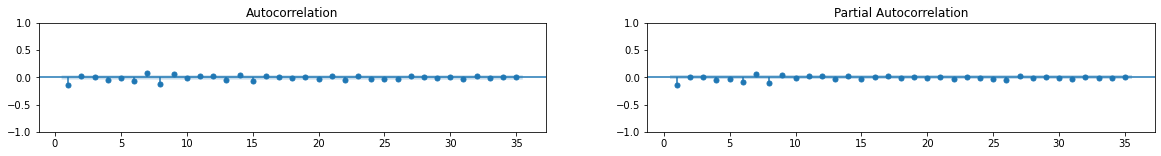

In [477]:
fig, ax = plt.subplots(1,2, figsize=(20,2))
plot_acf(msft_return, zero=False, ax=ax[0])
plot_pacf(msft_return, zero=False, ax=ax[1]); plt.show()

In [361]:
volatility = msft_return.std()
volatility

close    0.015993
dtype: float64

In [362]:
annualized = np.sqrt(252)*volatility
annualized

close    0.253888
dtype: float64

<AxesSubplot:xlabel='Date'>

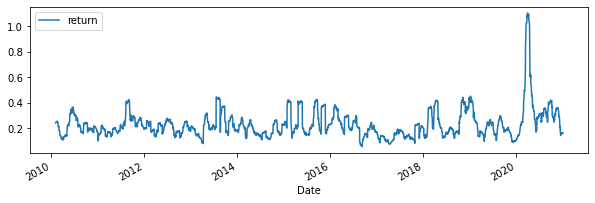

In [451]:
msft_return.rolling(22).apply(lambda x: x.std()*np.sqrt(252)).plot()

In [463]:
train, test = split_data(msft_return, 0.10)

train: 2491 , test: 277


In [464]:
msft_gm = arch_model(train).fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.0009688463452016e+20
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2630851955.044345
Iteration:      3,   Func. Count:     31,   Neg. LLF: 85543857193550.4
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7105.53750115863
            Iterations: 3
            Function evaluations: 41
            Gradient evaluations: 3


$\omega$, $\alpha$ and $\beta$ are estimated by Maximum Likelihood Method

In [465]:
msft_gm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7105.54
Distribution:                  Normal   AIC:                          -14203.1
Method:            Maximum Likelihood   BIC:                          -14179.8
                                        No. Observations:                 2491
Date:                Tue, Dec 21 2021   Df Residuals:                     2490
Time:                        22:39:39   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0947e-03  2.689e-04      4.071  4.672e-05 [5.677e-04,1.622e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.0636e-05  5.076e-12  4.066e+06      0.000 [2.064e-05,2.064e-05]
alpha[1]       0.1000  2.960e-02      3.378  7.294e-04   [4.198e-02,  0.158]
beta[1]        0.8000  2.868e-02     27.893 3.210e-171     [  0.744,  0.856]
============================================================================

Covariance estimator: robust
"""

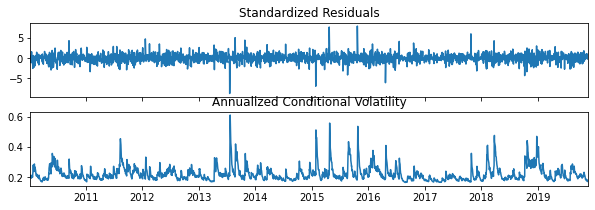

In [466]:
msft_gm.plot(annualize='D');

<AxesSubplot:>

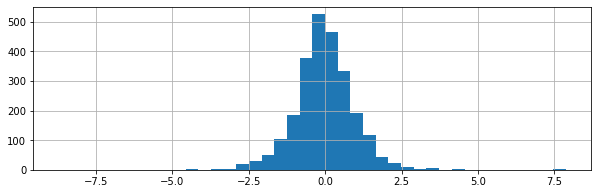

In [529]:
msft_gm.std_resid.hist(bins=40)

In [546]:
msft_vol_forecast = msft_gm.forecast(reindex=False)
print(msft_vol_forecast.variance)

                 h.1
Date                
2019-11-25  0.000121


In [552]:
msft_vol_forecast = msft_gm.forecast(horizon=test.shape[0], 
                                     reindpip install --upgrade tsmoothieex=False)
msft_vol_forecast.variance.shape

(1, 277)

In [561]:
melted_df = pd.melt(msft_vol_forecast.variance)
melted_df.index = test.index
print(melted_df.head())

           variable     value
Date                         
2019-11-26    h.001  0.000121
2019-11-27    h.002  0.000130
2019-11-29    h.003  0.000137
2019-12-02    h.004  0.000144
2019-12-03    h.005  0.000150


<AxesSubplot:xlabel='Date'>

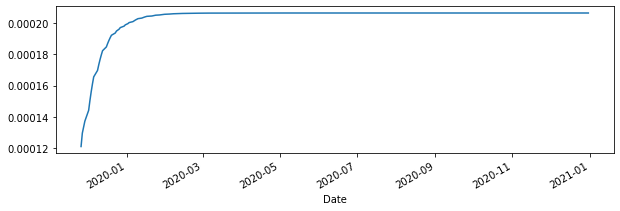

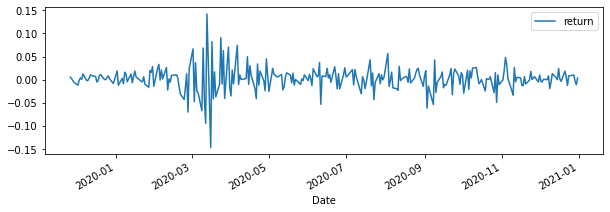

In [562]:
forecast = msft_vol_forecast.variance[-1:].values.ravel()
pd.Series(forecast, index=test.index).plot()
test.plot()

# Forecasting Time Series Data using Kalman Filter Algorithm

In [32]:
from darts import TimeSeries
from darts.models import KalmanFilter, FFT, ExponentialSmoothing, AutoARIMA

Importing plotly failed. Interactive plots will not work.


In [35]:
milk_model = ExponentialSmoothing(seasonal_periods=12)
milk_ts = TimeSeries.from_dataframe(milk.reset_index(), 
                                    time_col='month', value_cols='production', freq='MS')

In [101]:
milk.shape

(168, 1)

In [110]:
test_split = 0.15
l = len(milk)
t_idx = l - round(l*test_split)
milk_train = milk_ts.diff()[ : t_idx]
milk_test = milk_ts.diff()[t_idx : ]
# milk_train, milk_test = split_data(milk_ts.diff(), p)

In [111]:
milk_model.fit(milk_train)
milk_pred = milk_model.predict(len(milk_test), num_samples=1000)

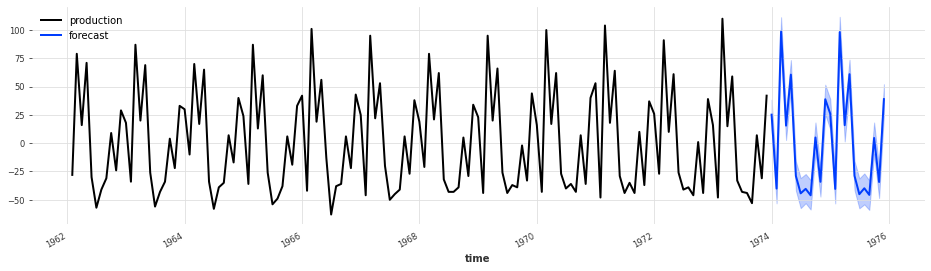

In [112]:
milk_train.plot()
milk_pred.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)

In [116]:
milk_filtered = KalmanFilter().filter(milk_ts.diff())
milk_model_filtered = ExponentialSmoothing(seasonal_periods=12)

p = 0.15
# milk_train_filtered, milk_test_filtered = split_data(milk_filtered, p)
milk_train_filtered = milk_filtered[ : t_idx]
milk_test_filtered = milk_filtered[t_idx : ]

In [117]:
milk_model_filtered.fit(milk_train_filtered)
milk_pred_filtered = milk_model_filtered.predict(len(milk_test), num_samples=1000)

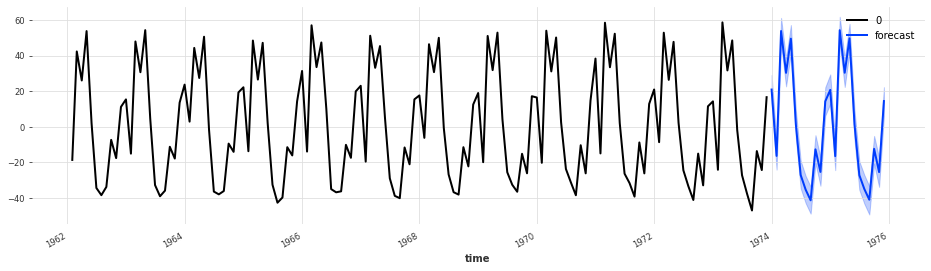

In [118]:
milk_train_filtered.plot()
milk_pred_filtered.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)

# Forecasting Time Series with Multiple Seasonal Components using TBATS

In [13]:
from sktime.forecasting.tbats import TBATS

In [14]:
web = Path('../../datasets/Ch9/web_traffic.csv')
weather = Path('../../datasets/Ch9/weather.csv')
elec = Path('../../datasets/Ch9/vic_elec.csv')

In [15]:
electdemand = pd.read_csv(elec, 
                          index_col='Time', 
                          parse_dates=True,
                         usecols=['Time', 'Demand', 'Temperature'])

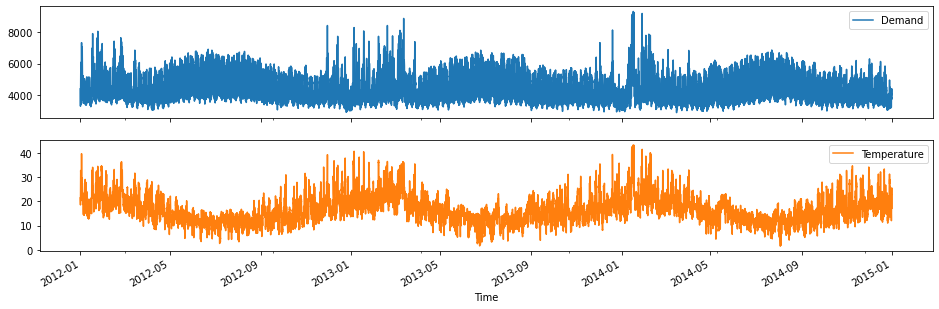

In [16]:
electdemand.plot(subplots=True,figsize=(16, 5)); plt.show()

In [17]:
elect2014 = electdemand['Demand'].loc['2014':]

In [21]:
elect2014 = elect2014.sort_index()

In [45]:
train, test = split_data(elect2014, 0.75)

train: 4380 , test: 13140


In [23]:
model = TBATS(sp=[14, 30.5], n_jobs=1, use_box_cox=False, use_trend=False, use_damped_trend=False)

In [46]:
model = TBATS()

In [47]:
model.fit(train)

TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=True, sp=None, use_arma_errors=True,
      use_box_cox=None, use_damped_trend=None, use_trend=None)

In [52]:
model.predict(fh=[1,2,3])

ValueError: Must supply freq for datetime value

In [39]:
test.index[0:3].values.tolist()

[1407452400000000000, 1407454200000000000, 1407456000000000000]

In [48]:
model.check_is_fitted()

In [49]:
model.get_fitted_params()

{'a': None, 'i': None, 'c': None}

In [50]:
model.get_test_params()

ModuleNotFoundError: No module named 'pyod'